In [112]:
import numpy as np

def loss(X, y, theta):
    m = len(X)
    y_prev = X.dot(theta)
    L = (1/m)*np.sum(np.square(y_prev - y))

    return L

def gradient(X, y, theta):
    m = len(X)
    y_prev = X.dot(theta)
    grad = (1/m)*X.T.dot(y_prev-y)
    return grad

def stochastic_gradient_descent(X, y, learning_rate, theta_init, N, eps):
    m = len(X)
    theta = theta_init.copy()
    L_history = np.zeros(N)

    for i in range(0,N):
        rand_index = np.random.randint(0, m)

        X_i = np.array([X[rand_index, :]]).reshape(1, -1)
        y_i = np.array([y[rand_index, :]]).reshape(1, -1)
        
        grad = gradient(X_i, y_i, theta)
        theta_new = theta - learning_rate*grad
        if np.linalg.norm(gradient(X_i, y_i, theta_new)) < eps:
            print('Found minimum', theta_new.T)
            break
        theta = theta_new
        L_history[i] = loss(X, y, theta)
    else: print("Accelerated gradient descent did not converge after", N, "iterations.")
    return theta, L_history, i


# Age
X = np.array([[39], [36], [45], [47], [65], [46], [67], [42], [67], [56], [64], [56], [59], [34], [42], [48], [45], [17], [20], [19]])
# HATT
y = np.array([[144], [136], [138], [145], [162], [142], [170], [124], [158], [154], [162], [150], [140], [110], [128], [130], [135], [114], [116], [124]])

# X = np.array([[1], [2], [3], [4], [5]])
# y = np.array([[2], [4], [5], [4], [5]])

#one = np.ones((X.shape[0],1))
X = np.concatenate([np.ones((len(X),1)), X], axis = 1)

theta_init = np.zeros((2,1))
eta = 0.01
N = 100
epsilon = 1e-5

theta, L_history, i = stochastic_gradient_descent(X, y, eta, theta_init, N, epsilon)

print("Hệ số tìm được: ", theta.ravel())
print("Số vòng lặp: ", i)
age_new = 26
HATT_new = theta[0] + theta[1]*age_new
print("Huyết áp tâm thu của một người ở độ tuổi 26 là: ", HATT_new)



Accelerated gradient descent did not converge after 100 iterations.
Hệ số tìm được:  [-9.19704358e+118 -1.11316375e+120]
Số vòng lặp:  99
Huyết áp tâm thu của một người ở độ tuổi 26 là:  [-2.90342278e+121]


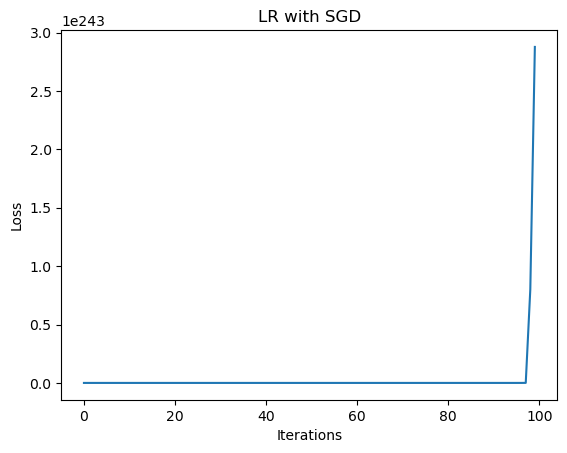

[9.96678004e+005 3.61034281e+008 1.34036564e+011 2.58331275e+014
 9.27731705e+014 8.55466821e+017 5.85266427e+018 5.39709783e+021
 1.09120937e+024 7.47264678e+024 1.51173683e+027 2.91320128e+030
 4.65416776e+033 4.29274773e+036 4.79490476e+038 3.28482072e+039
 2.97873198e+040 3.32917334e+042 9.22953526e+044 2.55862955e+047
 9.49125392e+049 1.35978216e+052 2.62024151e+055 2.36721940e+056
 8.78294713e+058 2.43475436e+061 9.90537899e+063 3.67436517e+066
 4.10456003e+068 8.30023018e+070 2.30104061e+073 4.65278470e+075
 5.32154913e+078 4.90828354e+081 2.38640385e+084 4.59882739e+087
 4.24171905e+090 1.17584079e+093 1.34486187e+096 1.21520295e+097
 3.36989460e+099 1.25005010e+102 8.55725268e+102 2.37308718e+105
 4.03969767e+108 7.78532165e+111 7.03370440e+112 1.00838881e+115
 4.90285728e+117 1.35914538e+120 9.30553971e+120 1.06407474e+124
 2.15137553e+126 8.75258577e+128 2.42636574e+131 1.66123041e+132
 4.60687887e+134 1.27710426e+137 1.82972486e+139 7.44404699e+141
 1.18920335e+145 2.291832

In [113]:
import matplotlib.pyplot as plt
plt.plot(L_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('LR with SGD')
plt.show()
print(L_history)